In [1]:
### 这个文件尝试了 GEM包中的 图分解算法 一共四个
###
### 导入 networkx 包 以及一个作为例子的图
import networkx as nx

G=nx.karate_club_graph()

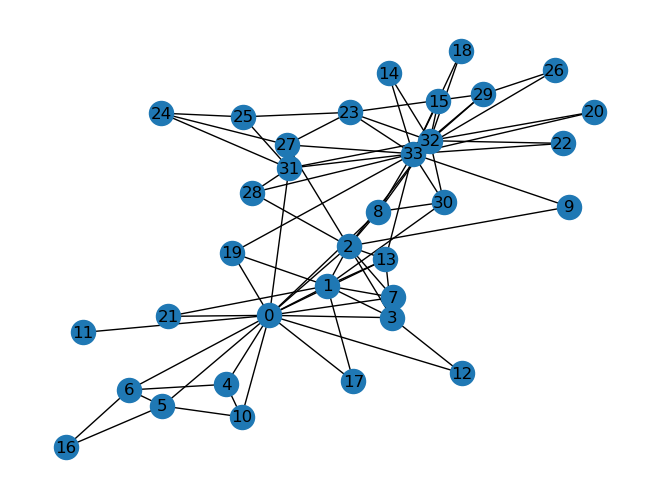

In [2]:
### 画出图来看一看
nx.draw(G, with_labels=True)

In [3]:
#import matplotlib
#import matplotlib.pyplot as plt

### 导入相关包
from gem.embedding.gf import GraphFactorization
from gem.embedding.hope import HOPE
from gem.embedding.lap import LaplacianEigenmaps
from gem.embedding.lle import LocallyLinearEmbedding

In [4]:
### 将G转化为有向图
G = G.to_directed()

In [5]:
%%time
### Graph Factorization 方法 C++
model_gf = GraphFactorization(d=2, max_iter=50000, eta=1 * 10**-4, regu=1.0, data_set = '')
### data_set 是可选参数 用于一个文件的命名 比如在原文件中 是'Karate'

model_gf_embd = model_gf.learn_embedding(graph=G, is_weighted=True, no_python=True)

### Graph Factorization 方法结果
model_gf_embd[:8]

	Iter id: 0
		Objective: 1594.02, f1: 1594.01, f2:0.00658309
	Iter id: 10000
		Objective: 1592.21, f1: 1592.11, f2:0.100833
	Iter id: 20000
		Objective: 1583.67, f1: 1582.97, f2:0.702118
	Iter id: 30000
		Objective: 1574.42, f1: 1572.95, f2:1.46475
	Iter id: 40000
		Objective: 1568.86, f1: 1566.9, f2:1.96063
CPU times: user 26 s, sys: 1.49 s, total: 27.5 s
Wall time: 26 s


array([[-1.57623791e-01, -1.95729048e-02],
       [-1.80979844e-01,  2.34685082e-02],
       [-1.69394337e-01,  1.29564480e-02],
       [-3.69601614e-02,  1.28886269e-02],
       [-2.19968807e-02, -5.92154037e-02],
       [-4.14810695e-02, -8.24402412e-02],
       [-2.01144841e-02, -3.22130570e-02],
       [ 1.58425205e-05,  9.09236516e-03]])

In [6]:
%%time
### Graph Factorization 方法 Python
model_gf = GraphFactorization(d=2, max_iter=50000, eta=1 * 10**-4, regu=1.0, data_set = '')
### data_set 是可选参数 用于一个文件的命名 比如在原文件中 是'Karate'

model_gf_embd = model_gf.learn_embedding(graph=G, is_weighted=True, no_python=False)

### Graph Factorization 方法结果
model_gf_embd[:8]

CPU times: user 25.6 s, sys: 801 ms, total: 26.4 s
Wall time: 25.4 s


array([[ 0.0650103 , -0.15239634],
       [ 0.05272608, -0.17569189],
       [ 0.05917937, -0.15866802],
       [-0.00315619, -0.03884238],
       [ 0.02489787, -0.01487685],
       [ 0.06450677, -0.04731503],
       [ 0.03594315, -0.02804078],
       [-0.00977311, -0.00737107]])

In [7]:
%%time
### HOPE 方法
model_hope = HOPE(d=2, beta=0.01) 
# A higher value of beta places more emphasis on capturing higher-order proximities

model_hope_embd = model_hope.learn_embedding(graph=G, is_weighted=True, no_python=True)

### HOPE 方法结果
model_hope_embd[:8]

SVD error (low rank): 0.345249
CPU times: user 16.3 ms, sys: 21.5 ms, total: 37.8 ms
Wall time: 7.39 ms


array([[-0.16437405, -0.16437405],
       [-0.1587958 , -0.1587958 ],
       [-0.18975886, -0.18975886],
       [-0.10449548, -0.10449548],
       [-0.0292987 , -0.0292987 ],
       [-0.03548386, -0.03548386],
       [-0.03496821, -0.03496821],
       [-0.09389957, -0.09389957]])

In [8]:
%%time
### Laplacian 方法
model_le = LaplacianEigenmaps(d=2)

model_le_embd = model_le.learn_embedding(graph=G, is_weighted=True, no_python=True)
### 输出Laplacian 方法结果
model_le_embd[:8]

Laplacian matrix recon. error (low rank): 6.303254
CPU times: user 14.4 ms, sys: 31.9 ms, total: 46.3 ms
Wall time: 6.83 ms


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


array([[-0.28814558,  0.11256712],
       [-0.14084241,  0.34438667],
       [-0.06725901,  0.27308951],
       [-0.13436137,  0.31539717],
       [-0.23229627, -0.16350094],
       [-0.35714964, -0.35801748],
       [-0.34138202, -0.33902251],
       [-0.10452288,  0.2593182 ]])

In [9]:
%%time
### Locally Linear 方法
model_lle = LocallyLinearEmbedding(d=2)

model_lle_embd = model_lle.learn_embedding(graph=G, is_weighted=True, no_python=True)
### 输出 Locally Linear 方法结果
model_lle_embd[:8]

CPU times: user 22.2 ms, sys: 73.8 ms, total: 96 ms
Wall time: 13 ms


array([[-0.17468994, -0.02181907],
       [ 0.14005714,  0.04971317],
       [ 0.13714224, -0.04746342],
       [-0.13949028,  0.01533642],
       [ 0.19788112,  0.0122718 ],
       [ 0.03105105,  0.00538143],
       [-0.04123454, -0.00490177],
       [ 0.28424185,  0.0323537 ]])

Comparing the above two cells, we see that `no_python` Option is faster...

In [10]:
%%time
### Node2Vec 方法
from gem.embedding.node2vec import node2vec
model_n2v = node2vec(d=2, max_iter=1, walk_len=80, num_walks=10, con_size=10, ret_p=1, inout_p=1)

model_n2v_embd = model_n2v.learn_embedding(graph=G, is_weighted=False, no_python=True)
### 输出 Locally Linear 方法结果
model_n2v_embd[:8]


An algorithmic framework for representational learning on graphs. [Jun 10 2023]
Input graph path (-i:)=tempGraph.graph
Output graph path (-o:)=tempGraph.emb
Number of dimensions. Default is 128 (-d:)=2
Length of walk per source. Default is 80 (-l:)=80
Number of walks per source. Default is 10 (-r:)=10
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=YES
Graph is weighted. (-w)=YES
Output random walks instead of embeddings. (-ow)=NO
Read 156 lines from tempGraph.graph
Preprocessing progress: 0.00% 
Walking Progress: 0.00%
Learning Progress: 73.53% 
CPU times: user 20.6 ms, sys: 10.8 ms, total: 31.4 ms
Wall time: 125 ms


array([[ 0.39777  , -7.27428  ],
       [ 0.232617 , -6.94047  ],
       [ 0.353121 , -6.84764  ],
       [ 0.114079 , -6.82054  ],
       [ 0.127113 , -7.12876  ],
       [ 0.0431327, -7.9161   ],
       [ 0.130391 , -7.83612  ],
       [ 0.207927 , -6.49805  ]])

In [11]:
%%time
### SDNE 方法
from gem.embedding.sdne import SDNE
model_sdne = SDNE(d=2, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3, n_units=[50, 15, ],
                       rho=0.3, n_iter=50, xeta=0.01, n_batch=100, modelfile=['enc_model.json', 'dec_model.json'],
                       weightfile=['enc_weights.hdf5', 'dec_weights.hdf5'])
model_sdne_embd = model_n2v.learn_embedding(graph=G, is_weighted=False, no_python=True)
### 输出 SDNE 方法结果
model_sdne_embd[:8]

2023-06-10 20:23:25.098782: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-10 20:23:27.732307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



An algorithmic framework for representational learning on graphs. [Jun 10 2023]
Input graph path (-i:)=tempGraph.graph
Output graph path (-o:)=tempGraph.emb
Number of dimensions. Default is 128 (-d:)=2
Length of walk per source. Default is 80 (-l:)=80
Number of walks per source. Default is 10 (-r:)=10
Context size for optimization. Default is 10 (-k:)=10
Number of epochs in SGD. Default is 1 (-e:)=1
Return hyperparameter. Default is 1 (-p:)=1
Inout hyperparameter. Default is 1 (-q:)=1
Verbose output. (-v)=YES
Graph is directed. (-dr)=YES
Graph is weighted. (-w)=YES
Output random walks instead of embeddings. (-ow)=NO
Read 156 lines from tempGraph.graph
Preprocessing progress: 0.00% 
Walking Progress: 0.00%
Learning Progress: 73.53% 
CPU times: user 1.62 s, sys: 1.54 s, total: 3.16 s
Wall time: 9.44 s


array([[-6.61852,  5.82457],
       [-6.34009,  5.3883 ],
       [-5.99058,  5.184  ],
       [-5.93177,  5.27066],
       [-5.60241,  5.14565],
       [-6.72031,  6.07331],
       [-6.70562,  6.05468],
       [-5.64262,  5.11857]])

这个笔记本会在运行目录下生成两个文件，分别为 边信息 和 嵌入信息